# Football Data Analysis & Visualization

<p>This is my first try at Data Analysis and Visualization. The Data is taken from Kaggle. 
Along with the analysis we will also visualize the data using different graphs.
The questions which we will look into are:</p>

<p>Pandas are used for analysis of Data and for visualization, matplotlib and seaborn is used. Different graphs like barplot, scatterplot, lineplot, jointplot, regplot are used to visualize the data.</p>

Reference Link:
1. <a href= "https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018">Dataset Link</a> 
2. <a href= "https://www.kaggle.com/slehkyi/football-transfers-2000-2018">Kernel Referred 1</a>
3. <a href= "https://www.kaggle.com/dhandepp/transfer-analysis-and-prediction-beginner">Kernel Referred 2</a>


<b>A. Analyzing Leagues</b>
1. Top 5 Leagues by turnover in selling player
2. Top 5 Leagues by turnover in buying player
3. Profits of League
4. Summary

<b>B. Analyzing Clubs</b>
1. Top Sellers
2. Top Buyers
3. Profitable Clubs
4. Summary

<b>C. Positions</b>
1. Different Positions Bought
2. Individual Position and top teams buying that position
3. Top Buying Team for each position
4. Top Selling Team for each position
5. Summary of Top Buying and Top Selling Position for each position

<b>D. Teams and Transfer</b>
1. Highest Bought Player for each Team
2. Highest Sold Player for each Team
3. Summary

<b>E. Age Analysis w.r.t Transfer Fee</b>
1. Number of players for each age
2. Age and Tranfer relation represented by:
i. Scatterplot
ii. Jointplot
iii. Regplot
iv. Lineplot

<b>F. Seasons and Transfer Fee</b>
1. Total Tranfer Fee per Season
2. Total Tranfer Fee per Season for Top Leagues
3. Total Position Brought each Season in Premier League

<b>G. Arsenal Analysis (Because its my favourite club)</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('Datasets/top250-00-19.csv')
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


#### One Player Named "Marzouq Al-Otaibi" has his age 0, so we replace that age with proper age of 25; the age at which he transferred 

In [6]:
df = df.replace({0:25})

#### Replacing Positions with a more general position
F: Forward
M: Midfield
D: Defender
G: Goalkeeper

In [7]:
position_map = {'Right Winger': 'F','Centre-Forward':'F','Left Winger':'F','Centre-Back':'D','Central Midfield':
               'M','Attacking Midfield': 'M', 'Defensive Midfield': 'M','Second Striker': 'F', 'Goalkeeper': 'G',
               'Right-Back':'D','Left Midfield': 'M', 'Left-Back':'D','Right Midfield':'M','Forward':'F','Sweeper':'M',
               'Defender':'D','Midfielder':'M'}

In [8]:
df['New_position'] = pd.Series(df.Position.map(position_map), index = df.index)

In [9]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [10]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,New_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000,F
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000,F
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000,F
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000,F
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000,F


## Analyzing League

### Top 5 Leagues by turnover in Selling Player

In [7]:
league_from = df.groupby(['League_from'])['Transfer_fee'].sum()
top5sell_league = league_from.sort_values(ascending = False).head(5)
top5sell_league = top5sell_league / 1000000 
top5sell_league.head()

League_from
Premier League    7248.51
Serie A           7083.98
LaLiga            5533.86
Ligue 1           4396.89
1.Bundesliga      3062.96
Name: Transfer_fee, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

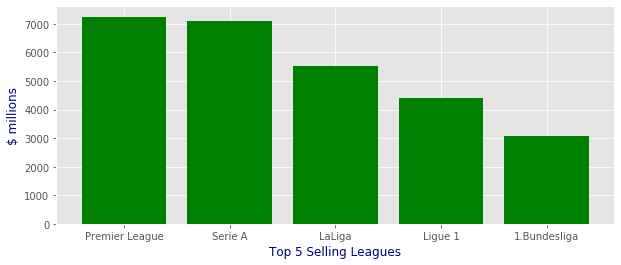

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(top5sell_league.index, top5sell_league.values, color='green')
ax.set_ylabel("$ millions", color='navy')
ax.set_xlabel("Top 5 Selling Leagues", color='navy')
plt.show

### Top 5 Leagues by turnover in Buying Player

In [9]:
league_to = df.groupby(['League_to'])['Transfer_fee'].sum()
top5buy_league = league_to.sort_values(ascending = False).head(5)
top5buy_league = top5buy_league/1000000
top5buy_league.head()

League_to
Premier League    14695.400
Serie A            7535.220
LaLiga             6680.360
Ligue 1            3682.720
1.Bundesliga       3599.645
Name: Transfer_fee, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

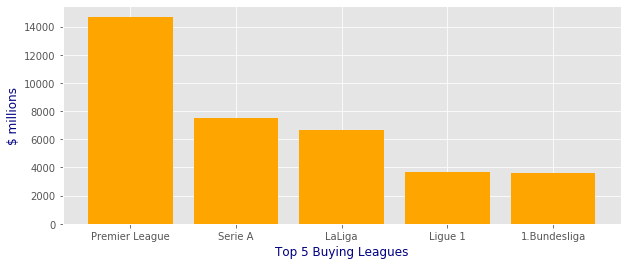

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(top5buy_league.index, top5buy_league.values, color='orange')
ax.set_ylabel("$ millions", color='navy')
ax.set_xlabel("Top 5 Buying Leagues", color='navy')
plt.show

### Summary 

In [11]:
diff_league = top5sell_league - top5buy_league  
diff_league = diff_league.sort_values(ascending = False)
diff_league.head()

League_from
Ligue 1            714.170
Serie A           -451.240
1.Bundesliga      -536.685
LaLiga           -1146.500
Premier League   -7446.890
Name: Transfer_fee, dtype: float64

In [12]:
league_summary = pd.concat([top5sell_league,top5buy_league],axis = 1)
league_summary['Diff'] = diff_league
new_columns = league_summary.columns.values
new_columns[[0,1]]=['sell','buy']
league_summary.columns = new_columns
league_summary.fillna(0)
league_summary.head(5)

,sell,buy,Diff
Premier League,7248.51,14695.400,-7446.890
Serie A,7083.98,7535.220,-451.240
LaLiga,5533.86,6680.360,-1146.500
Ligue 1,4396.89,3682.720,714.170
1.Bundesliga,3062.96,3599.645,-536.685


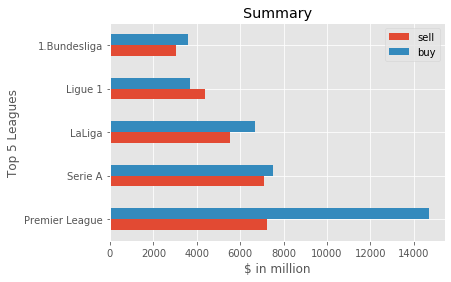

In [13]:
a = league_summary.reset_index()
a.plot(x='index',y=['sell','buy'],kind='barh')
plt.title('Summary')
plt.ylabel('Top 5 Leagues')
plt.xlabel('$ in million')
plt.show()

Premier League Teams certaining spends more money in buying then selling as compared to all leagues

## Analyzing Clubs 

### Top Sellers 
Total Money gained divided by Total Players sold

In [14]:
sellers = df.groupby(['Team_from'])['Transfer_fee'].sum()
total_sold = df.groupby(['Team_from'])['Transfer_fee'].count()
biggest_sellers = (sellers/1000000) / total_sold 
biggest_sellers = biggest_sellers.sort_values(ascending  = False).head()
biggest_sellers

Team_from
Athletic Bilbao    31.800000
RB Leipzig         23.300000
Monaco             20.173830
FC Augsburg        20.000000
FC Barcelona       19.792105
Name: Transfer_fee, dtype: float64

### Top Buyers
Total Money spent divided by Total Players bought

In [15]:
buyers = df.groupby(['Team_to'])['Transfer_fee'].sum()
total_sold = df.groupby(['Team_to'])['Transfer_fee'].count()
biggest_buyers = (buyers/1000000) / total_sold 
biggest_buyers = biggest_buyers.sort_values(ascending  = False).head()
biggest_buyers

Team_to
SIPG            25.983333
FC Barcelona    23.900571
CC Yatai        23.300000
Man Utd         23.036308
Real Madrid     22.408667
Name: Transfer_fee, dtype: float64

#### Top Sellers and Top Buyers graphically

<function matplotlib.pyplot.show(*args, **kw)>

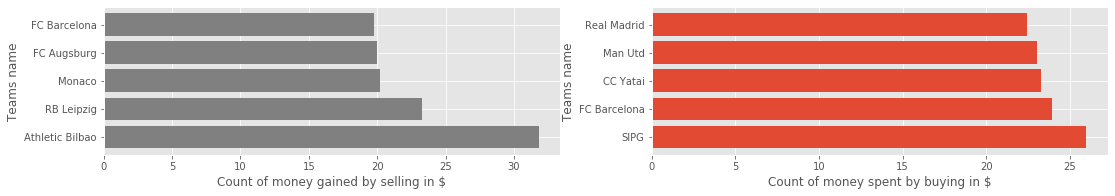

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(2,2,1)
plt.barh(biggest_sellers.index, biggest_sellers.values,color='grey')
plt.xlabel("Count of money gained by selling in $")
plt.ylabel("Teams name")

plt.subplot(2,2,2)
plt.barh(biggest_buyers.index, biggest_buyers.values)
plt.xlabel("Count of money spent by buying in $")
plt.ylabel("Teams name")

plt.show

### Summary

In [17]:
profit_club = sellers - buyers  
profit_club = profit_club.sort_values(ascending = False)
profit_club = profit_club.dropna()
profit_club = profit_club/1000000
top5profit = profit_club.head()
top5loss = profit_club.tail()
print(top5profit)
print()
print(top5loss)

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Name: Transfer_fee, dtype: float64

Paris SG        -880.15
FC Barcelona    -920.94
Man Utd         -969.79
Chelsea         -981.12
Man City       -1381.27
Name: Transfer_fee, dtype: float64


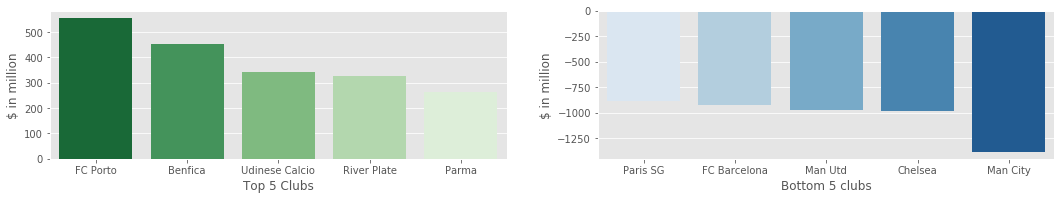

In [18]:
plt.figure(figsize=(18,6))
plt.title("Top 5 and Bottom 5")

plt.subplot(2,2,1)
sns.barplot(top5profit.index,top5profit.values,palette = "Greens_r")
plt.xlabel("Top 5 Clubs")
plt.ylabel("$ in million")

plt.subplot(2,2,2)
sns.barplot(top5loss.index,top5loss.values,palette = "Blues")
plt.xlabel("Bottom 5 clubs")
plt.ylabel("$ in million")

plt.show()

## Positions

### Different Position Bought 

Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Forward                  3
Midfielder               1
Sweeper                  1
Defender                 1
Name: Position, dtype: int64


Text(0, 0.5, 'Number of Players bought')

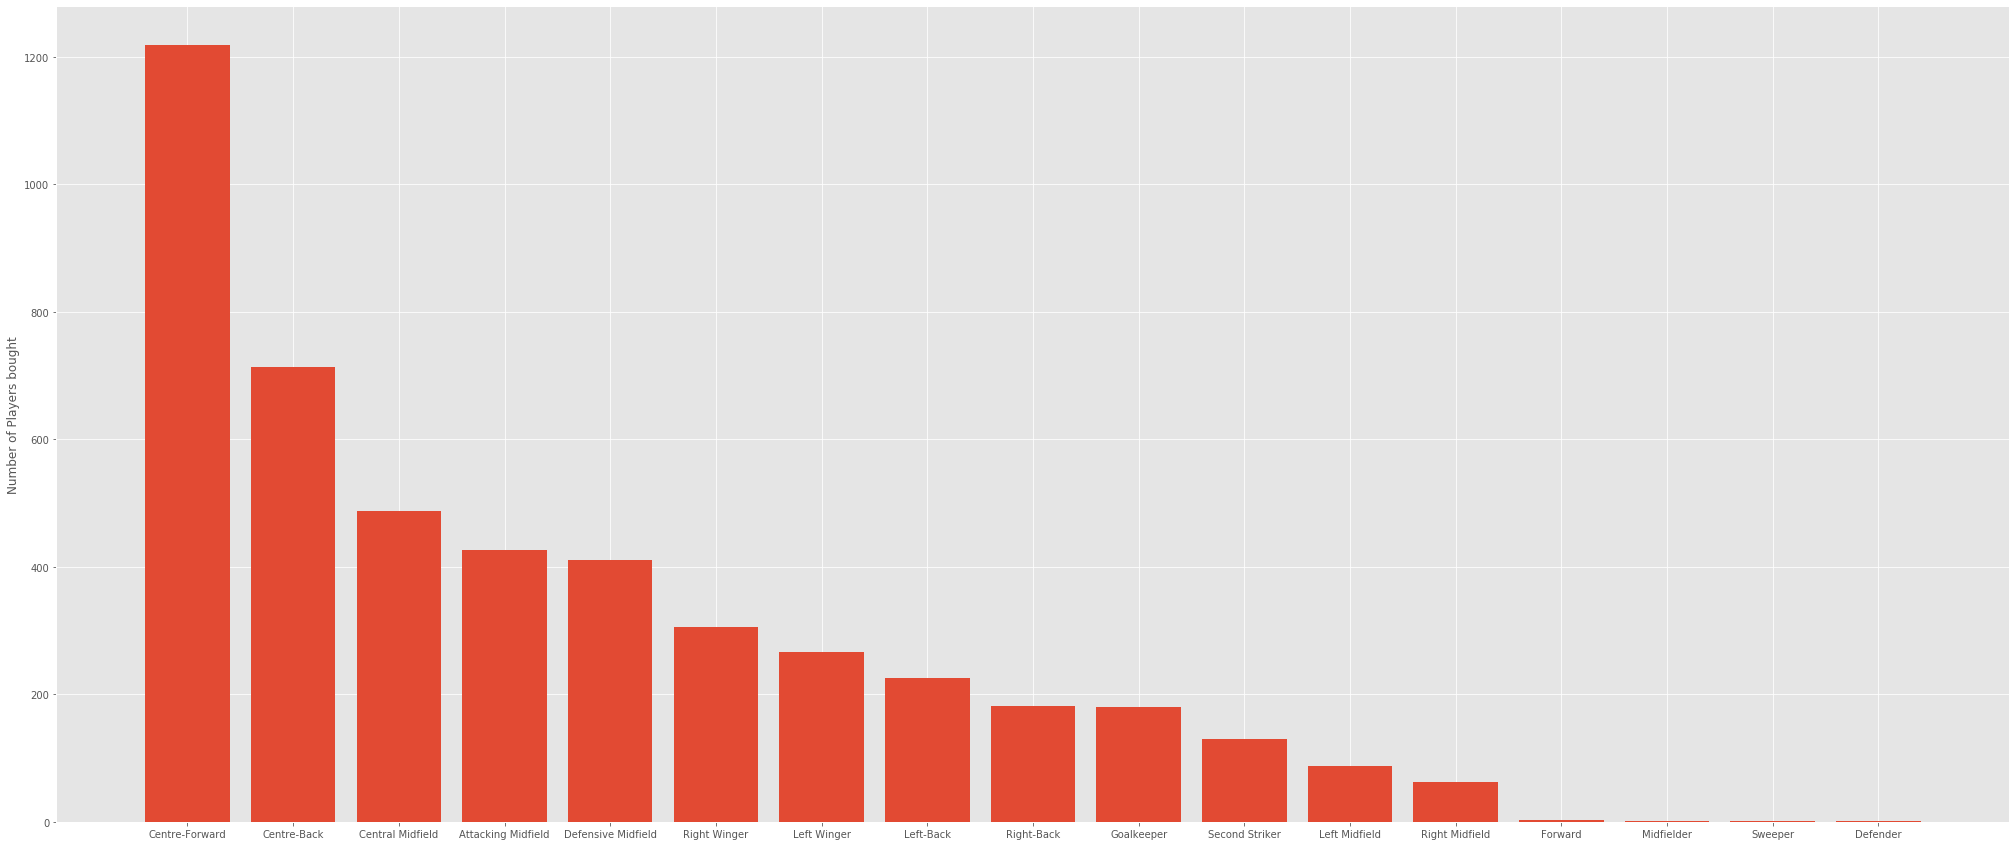

In [19]:
each_position = df.Position.value_counts()
print(each_position)
fig, ax = plt.subplots(figsize=(35,15))
ax.bar(each_position.index, each_position.values)
ax.set_ylabel("Number of Players bought")

Values by New Position

F    1923
M    1476
D    1121
G     180
Name: New_position, dtype: int64


Text(0.5, 0, 'Positions')

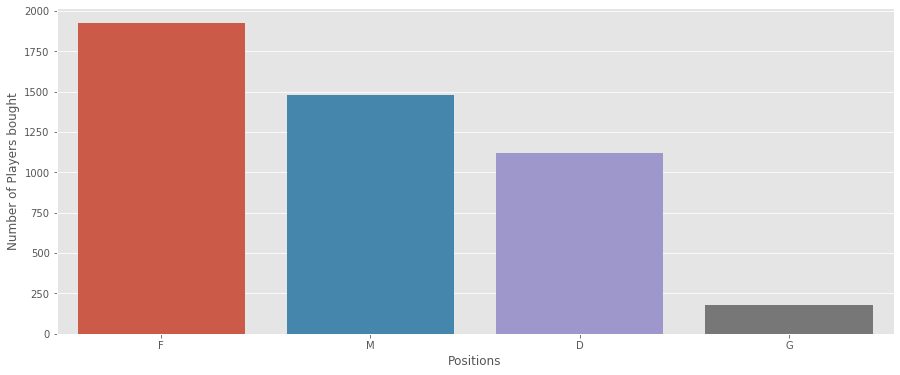

In [20]:
each_position_g = df.New_position.value_counts()
print(each_position_g)
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(each_position_g.index, each_position_g.values)
ax.set_ylabel("Number of Players bought")
ax.set_xlabel("Positions")

### Individual Position and Top Teams buying that position

Here we look into a left winger

Team_to
Real Madrid    9
Marseille      8
FC Porto       7
Fenerbahce     7
Inter          7
Name: Team_to, dtype: int64


Text(0, 0.5, 'Number of Players bought')

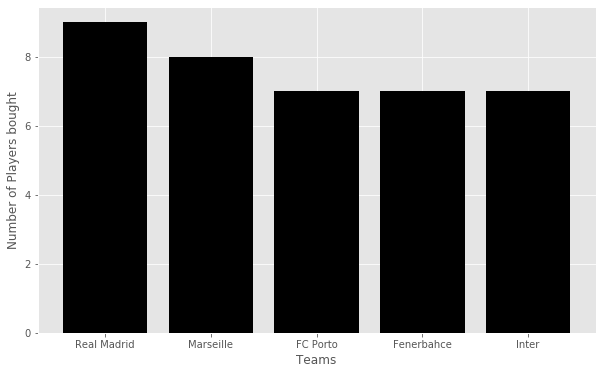

In [21]:
def Position_bought(pos):
    positions_bought = df.groupby(['Position'])['Team_to'].value_counts() 
    position = positions_bought.loc[pos]
    position_top5 = position.head(5)
    print(position_top5)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(position_top5.index, position_top5.values,color='Black')
    ax.set_xlabel("Teams")
    return ax.set_ylabel("Number of Players bought")

Position_bought('Attacking Midfield')

Values by New Position

Team_to
Real Madrid    33
Chelsea        32
Spurs          29
Inter          28
Juventus       27
Name: Team_to, dtype: int64


Text(0, 0.5, 'Number of Players bought')

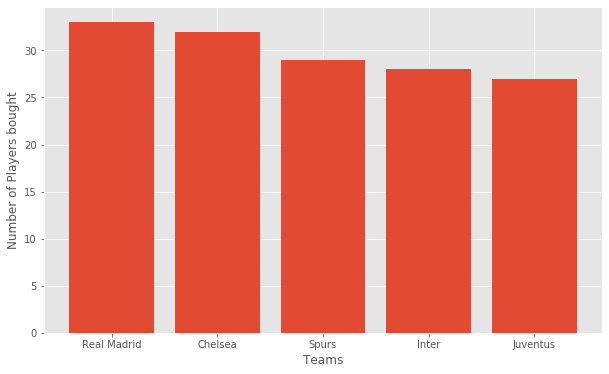

In [22]:
def Position_bought(pos):
    positions_bought = df.groupby(['New_position'])['Team_to'].value_counts() 
    position = positions_bought.loc[pos]
    position_top5 = position.head(5)
    print(position_top5)
    fig, ax = plt.subplots(figsize=(10,6))
    ax.bar(position_top5.index, position_top5.values)
    ax.set_xlabel("Teams")
    return ax.set_ylabel("Number of Players bought")

Position_bought('M') #Finding Midfields Bought

### Top Buying Team for each position

In [23]:
all_position_buy = df.groupby(['Position'])
position_team_buy = df.groupby(['Position'])['Team_to'].value_counts()
pos_list_buy=[]
team_list_buy=[]
count_list_buy=[]

for pos,name in all_position_buy:
    top_team_name = position_team_buy[pos].index[0]
    count = position_team_buy[pos][0]
    team_list_buy.append(top_team_name)
    count_list_buy.append(count)
    pos_list_buy.append(pos)
    
pos_team_buy = pd.DataFrame({'Position':pos_list_buy,'Team':team_list_buy,'Players Bought':count_list_buy})
pos_team_buy = pos_team_buy.set_index('Position')
pos_team_buy.sort_values(by='Players Bought',ascending = False,inplace = True)
pos_team_buy

,Team,Players Bought
Position,,
Centre-Forward,AC Milan,21
Centre-Back,Spurs,20
Central Midfield,Juventus,14
Defensive Midfield,Chelsea,12
Left Winger,Atlético Madrid,12
Attacking Midfield,Real Madrid,9
Goalkeeper,Man Utd,9
Left-Back,Inter,9
Right Winger,AS Roma,8


Object `ser_xticklables` not found.


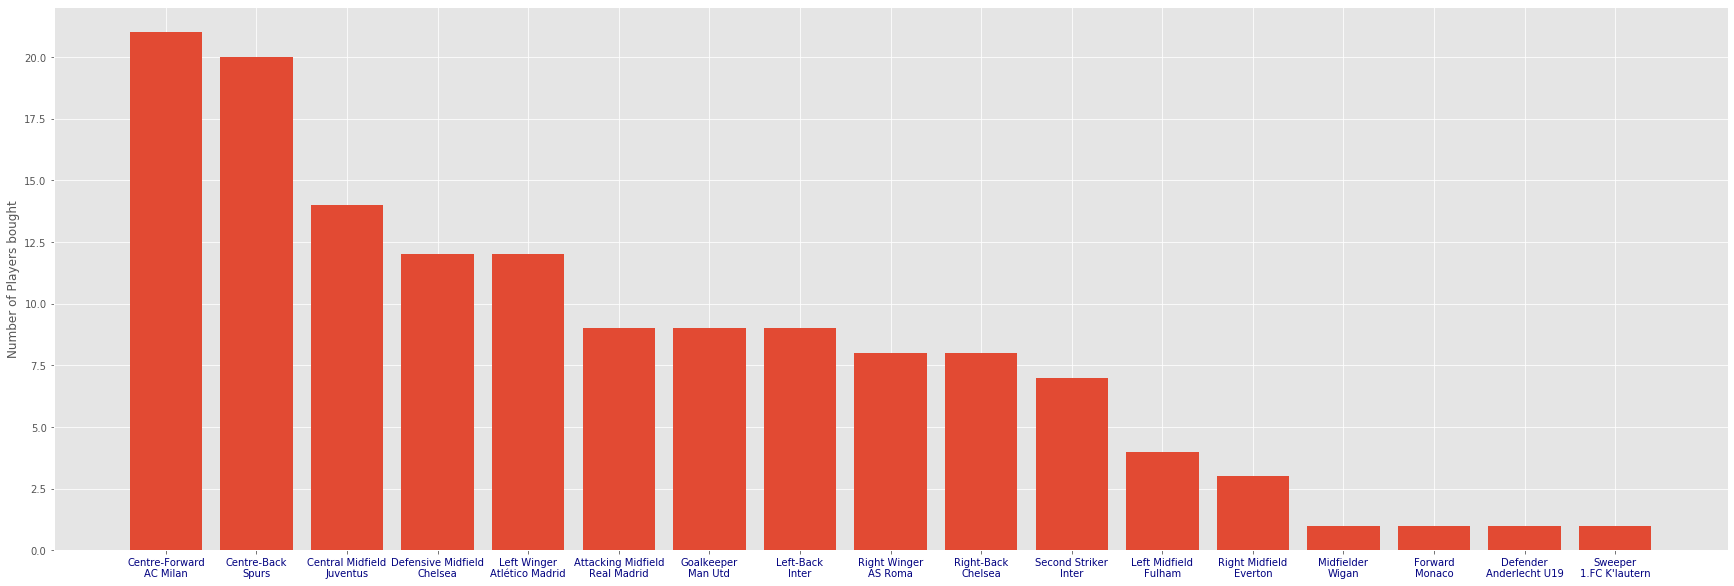

In [24]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x = pos_team_buy.index,height = pos_team_buy['Players Bought'])
ax.set_ylabel("Number of Players bought")
ax.set_xticklabels(labels=(pos_team_buy.index +'\n'+ pos_team_buy['Team']), color='navy')
ser_xticklables?

### Top Selling Team for each position

In [25]:
#tells us which player position is sold by which team the most time 
all_position_sell = df.groupby(['Position'])
position_team_sell = df.groupby(['Position'])['Team_from'].value_counts()
pos_list_sell=[]
team_list_sell=[]
count_list_sell=[]

for pos,name in all_position_sell:
    top_team_name = position_team_sell[pos].index[0]
    count = position_team_sell[pos][0]
    team_list_sell.append(top_team_name)
    count_list_sell.append(count)
    pos_list_sell.append(pos)
    
pos_team_sell = pd.DataFrame({'Position':pos_list_sell,'Team':team_list_sell,'Players Sold':count_list_sell})
pos_team_sell = pos_team_sell.set_index('Position')
pos_team_sell.sort_values(by='Players Sold',ascending = False,inplace = True)
pos_team_sell

,Team,Players Sold
Position,,
Centre-Forward,Inter,18
Defensive Midfield,Real Madrid,12
Centre-Back,FC Porto,11
Central Midfield,Atalanta,11
Attacking Midfield,Corinthians,9
Right Winger,FC Barcelona,8
Left Winger,Liverpool,7
Second Striker,Inter,6
Right-Back,FC Porto,6


Object `ser_xticklables` not found.


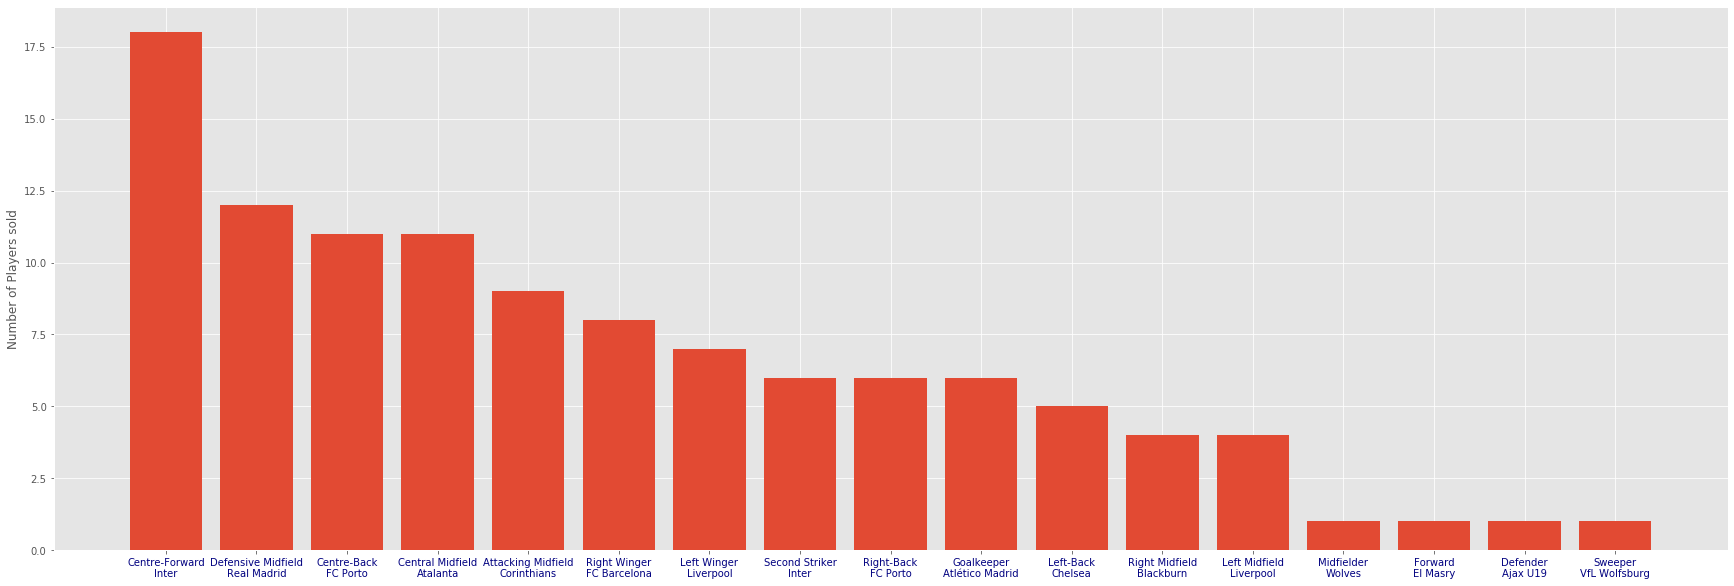

In [26]:
fig, ax = plt.subplots(figsize=(30,10))
ax.bar(x = pos_team_sell.index,height = pos_team_sell['Players Sold'])
ax.set_ylabel("Number of Players sold")
ax.set_xticklabels(labels=pos_team_sell.index +'\n'+ pos_team_sell['Team'], color='navy')
ser_xticklables?

### Summary 

In [27]:
positions_transfer_summary = pd.merge(pos_team_buy,pos_team_sell,on = "Position")
positions_transfer_summary = positions_transfer_summary.rename(columns={'Team_x': 'Team Bought','Team_y':'Team Sold'})
positions_transfer_summary

,Team Bought,Players Bought,Team Sold,Players Sold
Position,,,,
Centre-Forward,AC Milan,21,Inter,18
Centre-Back,Spurs,20,FC Porto,11
Central Midfield,Juventus,14,Atalanta,11
Defensive Midfield,Chelsea,12,Real Madrid,12
Left Winger,Atlético Madrid,12,Liverpool,7
Attacking Midfield,Real Madrid,9,Corinthians,9
Goalkeeper,Man Utd,9,Atlético Madrid,6
Left-Back,Inter,9,Chelsea,5
Right Winger,AS Roma,8,FC Barcelona,8


## Teams and  Transfer 

###  Highest Bought Player for each team

In [28]:
buy_filter = df.filter(['Team_to','Name','Transfer_fee','New_position'])
buy_filter = buy_filter.sort_values(['Team_to','Transfer_fee'],ascending = [True,False]).groupby(['Team_to']).first()
top1buy = buy_filter.sort_values('Transfer_fee',ascending = False)
top1buy = top1buy.reset_index()
top1buy = top1buy.rename(columns = {'Team_to':'Team'})
top1buy = top1buy.set_index('Team')
top1buy.head(10)

,Name,Transfer_fee,New_position
Team,,,
Paris SG,Neymar,222000000,F
FC Barcelona,Philippe Coutinho,125000000,M
Juventus,Cristiano Ronaldo,117000000,F
Man Utd,Paul Pogba,105000000,M
Real Madrid,Gareth Bale,101000000,F
Liverpool,Virgil van Dijk,78800000,D
Man City,Kevin De Bruyne,76000000,M
Atlético Madrid,Thomas Lemar,70000000,F
Chelsea,Álvaro Morata,66000000,F


###  Highest Sold Player for each team

In [29]:
sell_filter = df.filter(['Team_from','Name','Transfer_fee','New_position'])
sell_filter = sell_filter.sort_values(['Team_from','Transfer_fee'],ascending = [True,False]).groupby(['Team_from']).first()
#top1sell = sell_filter.first()
top1sell = sell_filter.sort_values('Transfer_fee',ascending = False)
top1sell = top1sell.reset_index()
top1sell = top1sell.rename(columns = {'Team_from':'Team'})
top1sell = top1sell.set_index('Team')
top1sell.head(10)
#top1sell.head(10)
#type(top1sell)

,Name,Transfer_fee,New_position
Team,,,
FC Barcelona,Neymar,222000000,F
Monaco,Kylian Mbappé,135000000,F
Liverpool,Philippe Coutinho,125000000,M
Real Madrid,Cristiano Ronaldo,117000000,F
Bor. Dortmund,Ousmane Dembélé,115000000,F
Juventus,Paul Pogba,105000000,M
Spurs,Gareth Bale,101000000,F
Man Utd,Cristiano Ronaldo,94000000,F
SSC Napoli,Gonzalo Higuaín,90000000,F


### Summary 

In [30]:
transfer_summary = pd.merge(top1buy,top1sell,on='Team')
transfer_summary = transfer_summary.rename(columns={'Name_x': 'Player Bought','Name_y':'Player Sold', 
                                                    'Transfer_fee_x': 'Bought For','Transfer_fee_y':'Sold For'})
transfer_summary.head(5)

,Player Bought,Bought For,New_position_x,Player Sold,Sold For,New_position_y
Team,,,,,,
Paris SG,Neymar,222000000,F,David Luiz,35000000,D
FC Barcelona,Philippe Coutinho,125000000,M,Neymar,222000000,F
Juventus,Cristiano Ronaldo,117000000,F,Paul Pogba,105000000,M
Man Utd,Paul Pogba,105000000,M,Cristiano Ronaldo,94000000,F
Real Madrid,Gareth Bale,101000000,F,Cristiano Ronaldo,117000000,F


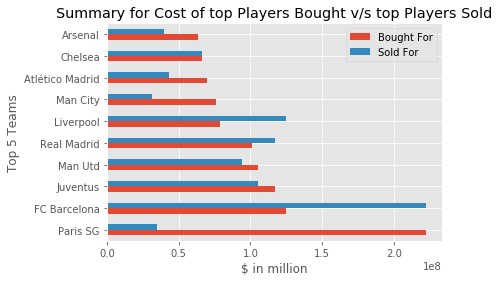

In [31]:
a = transfer_summary.reset_index().head(10)
a.plot(x='Team',y=['Bought For','Sold For'],kind='barh')
plt.title('Summary for Cost of top Players Bought v/s top Players Sold')
plt.ylabel('Top 5 Teams')
plt.xlabel('$ in million')
plt.show()

## Age Analysis w.r.t Transfer Fee 

### Number of Players for Each Age  

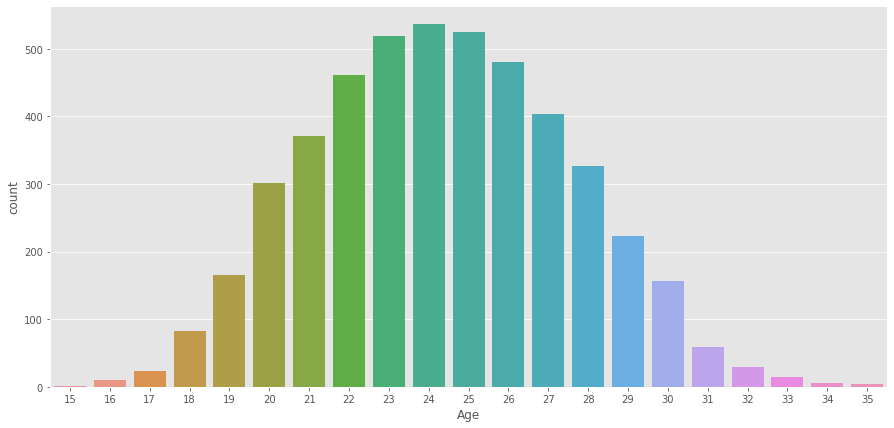

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=df)

### Age and Transfer Fee with: 

#### i. ScatterPlot 

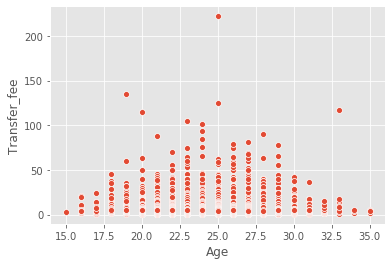

In [33]:
sns.scatterplot(x = df.Age, y = (df.Transfer_fee/1000000))

#### ScatterPlot with Marginal Distribution of Age and Transfer Fee

Also Position wise separation

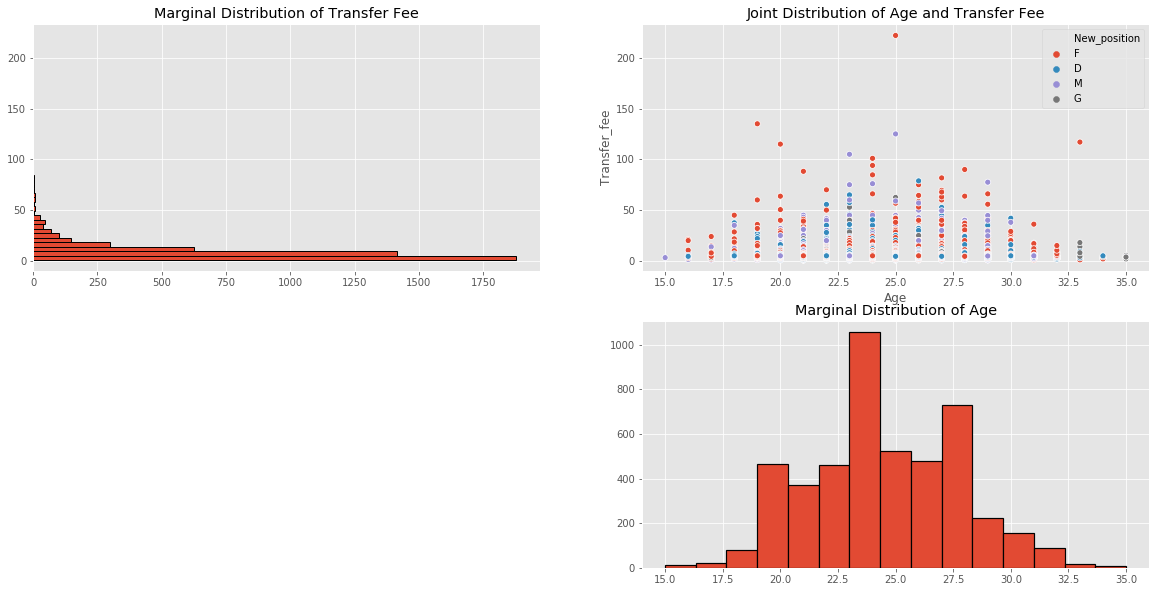

In [34]:
# Plot the data
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
sns.scatterplot(x = df.Age, y = (df.Transfer_fee/1000000),hue=df.New_position)
plt.title("Joint Distribution of Age and Transfer Fee")

# Plot the Marginal X Distribution
plt.subplot(2,2,4)
plt.hist(x = df.Age, bins = 15,edgecolor='black', linewidth=1.2)
plt.title("Marginal Distribution of Age")


# Plot the Marginal Y Distribution
plt.subplot(2,2,1)
plt.hist(x = (df.Transfer_fee/1000000),orientation = "horizontal",bins = 50,edgecolor='black', linewidth=1)
plt.title("Marginal Distribution of Transfer Fee")

# Show the plots
plt.show()

#### ii. JointPlot 

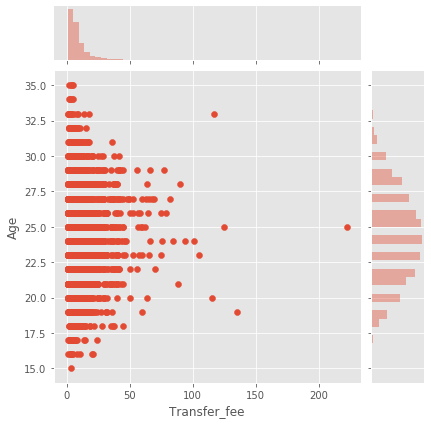

In [35]:
sns.jointplot(x= (df.Transfer_fee/1000000),  y=df.Age)

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


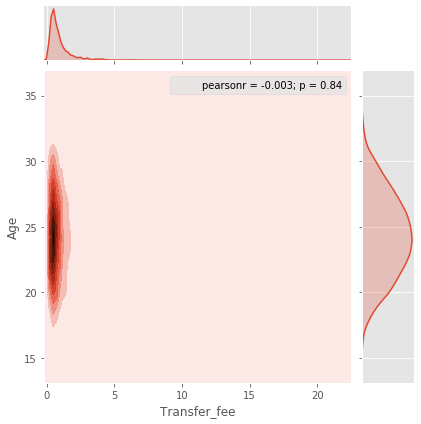

In [36]:
sns.jointplot(y=df.Age, x=(df.Transfer_fee/10000000), kind='kde', data=df).annotate(stats.pearsonr)

#### iii. regplot

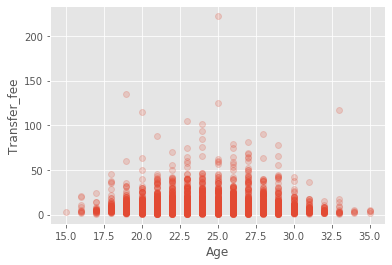

In [37]:
sns.regplot(x=df.Age, y=(df.Transfer_fee/1000000), data=df, fit_reg=False, scatter_kws={"alpha": 0.2})

#### iv. Lineplot

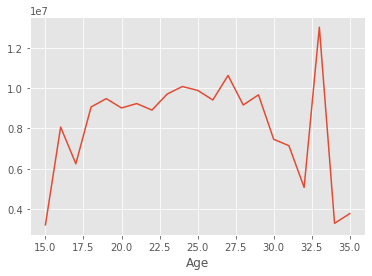

In [38]:
agetransfer = df.groupby('Age')['Transfer_fee'].agg('mean')
agetransfer.plot()

## Season and Tranfer Fee 

### Total tranfer fee per season

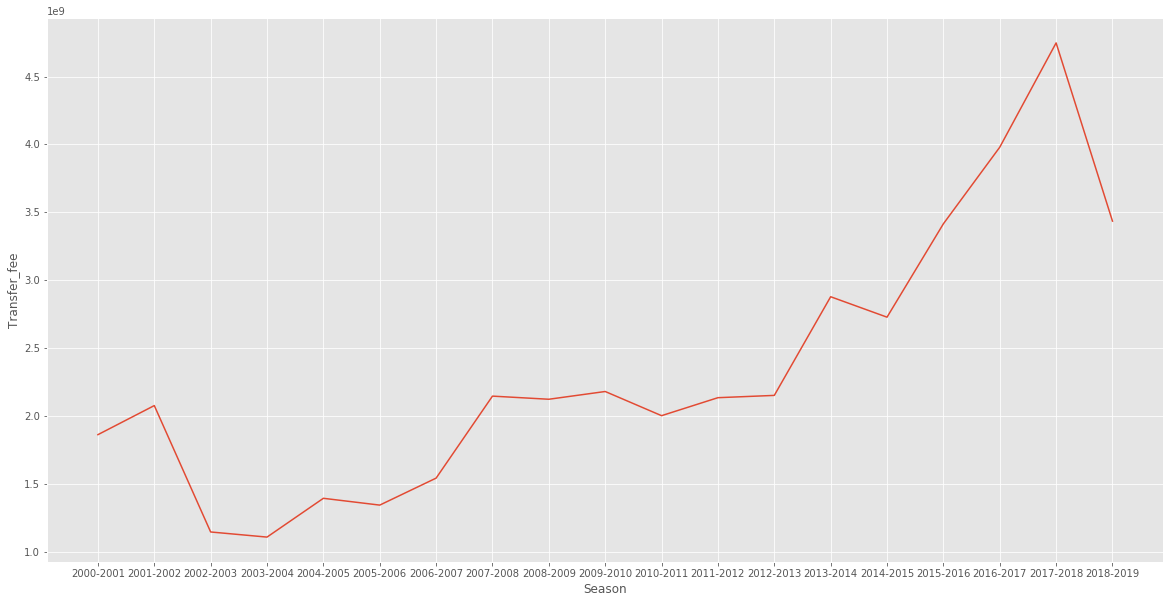

In [39]:
season_wise = df.groupby('Season')['Transfer_fee'].agg('sum').reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(x='Season', y='Transfer_fee', data = season_wise)

### Total Tranfer Fee per Season for Top Leagues

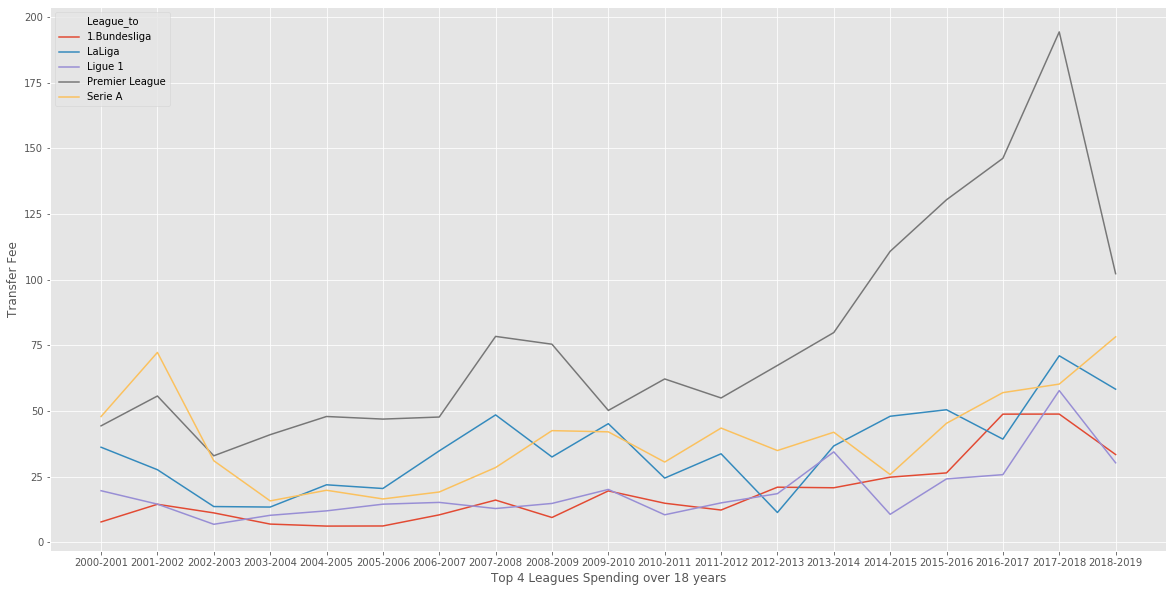

In [40]:
season_leagues = df.groupby(['League_to','Season'])['Transfer_fee'].agg('sum').reset_index()
select_leagues = ['Premier League','Serie A','LaLiga','Ligue 1','1.Bundesliga']
season_top5league = season_leagues.loc[season_leagues['League_to'].isin(select_leagues)]
plt.figure(figsize=(20,10))
#sns.lineplot(x='Season', y=(aa.Transfer_fee/10000000), data = aa,color='black')
ax = sns.lineplot(x='Season', y=(season_top5league.Transfer_fee/10000000),hue='League_to', data = season_top5league)
ax.set(xlabel="Top 4 Leagues Spending over 18 years", ylabel = "Transfer Fee")
plt.show()

### Total Position Brought each Season in Premier League

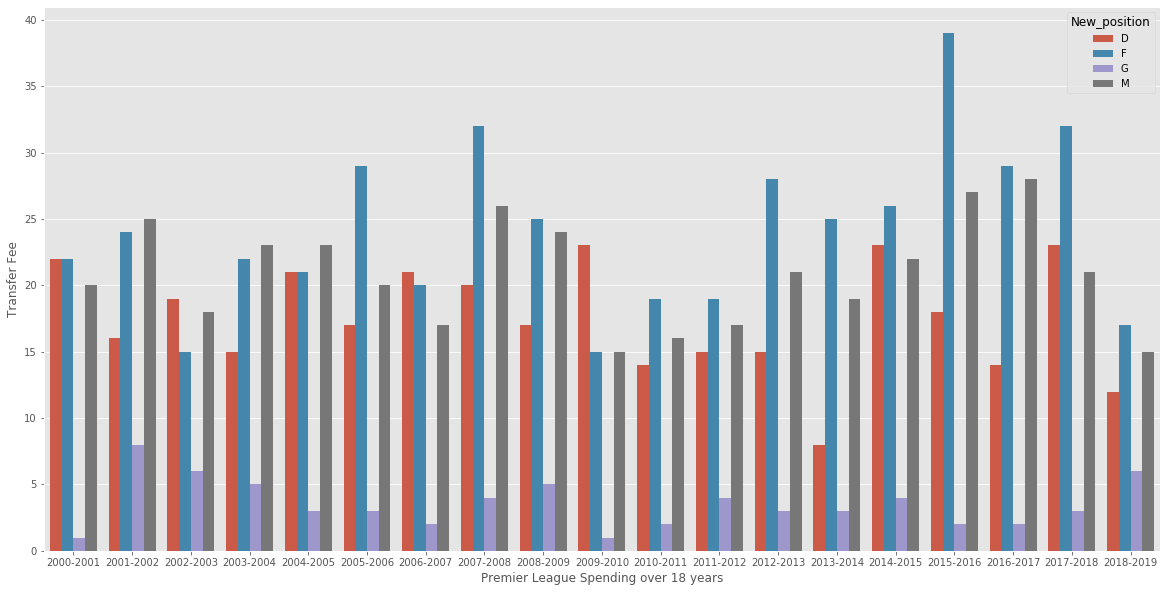

In [41]:
season_league = df.groupby(['League_to','Season','New_position']).agg(
    {'New_position': 'count'}).rename(columns={'New_position':'C'}).reset_index()
pl_league = season_league.loc[season_league['League_to']=='Premier League']

plt.figure(figsize=(20,10))
ax = sns.barplot(x='Season', y='C',hue='New_position',data = pl_league)
ax.set(xlabel="Premier League Spending over 18 years", ylabel = "Transfer Fee")
plt.show()

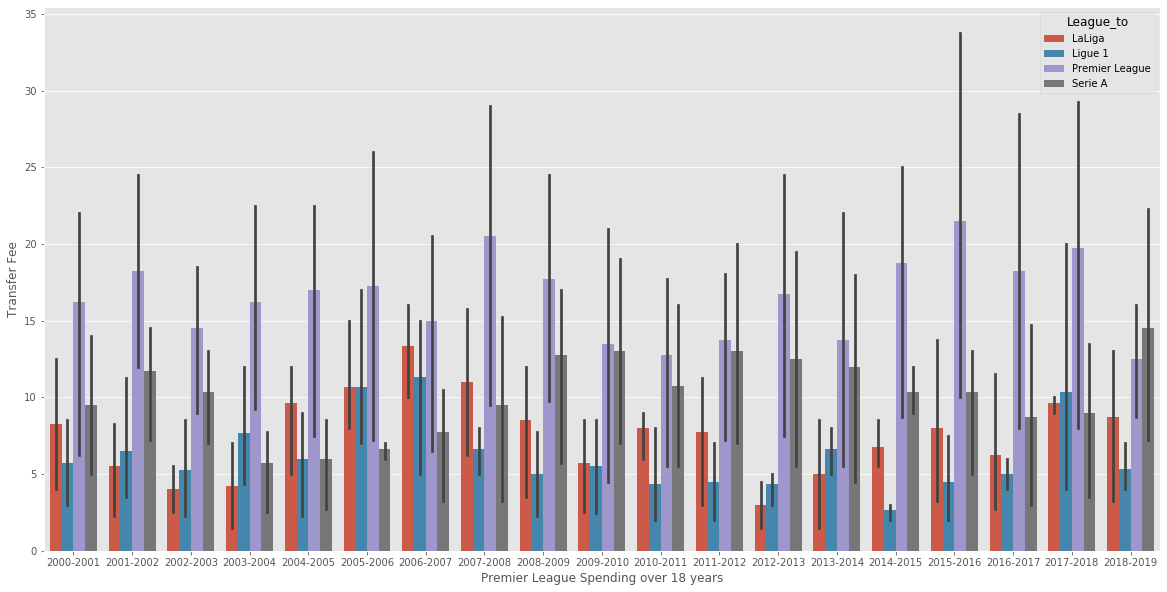

In [42]:
dd = df.groupby(['League_to','Season','New_position']).agg({'New_position': 'count'}).rename(columns={'New_position':'C'}).reset_index()
#bb.head()
select_league = ['Premier League','Serie A','LaLiga','Ligue 1']
ddd = dd.loc[dd['League_to'].isin(select_league)]
#bbbb =  bbb.loc[bb['New_position'] == 'F']
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Season', y='C',hue='League_to',data = ddd)
ax.set(xlabel="Premier League Spending over 18 years", ylabel = "Transfer Fee")
plt.show()

In [43]:
def Team_players(team):
    teams_buying = df.groupby('Team_to')
    return teams_buying.get_group(team).sort_values('Transfer_fee',ascending = False)
    
Team_players('Arsenal')

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,New_position
4219,Pierre-Emerick Aubameyang,Centre-Forward,28,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2017-2018,65000000.0,63750000,F
4221,Alexandre Lacazette,Centre-Forward,26,Olympique Lyon,Ligue 1,Arsenal,Premier League,2017-2018,40000000.0,53000000,F
3220,Mesut Özil,Attacking Midfield,24,Real Madrid,LaLiga,Arsenal,Premier League,2013-2014,40000000.0,47000000,M
3967,Granit Xhaka,Defensive Midfield,23,Bor. M'gladbach,1.Bundesliga,Arsenal,Premier League,2016-2017,25000000.0,45000000,M
3471,Alexis Sánchez,Left Winger,25,FC Barcelona,LaLiga,Arsenal,Premier League,2014-2015,30000000.0,42500000,F
...,...,...,...,...,...,...,...,...,...,...,...
830,Jens Lehmann,Goalkeeper,33,Bor. Dortmund,1.Bundesliga,Arsenal,Premier League,2003-2004,NaN,3500000,G
841,Cesc Fàbregas,Central Midfield,16,Barça Juvenil A,Spain,Arsenal,Premier League,2003-2004,NaN,3200000,M
1383,Abou Diaby,Central Midfield,19,AJ Auxerre,Ligue 1,Arsenal,Premier League,2005-2006,3000000.0,3000000,M
1397,Carlos Vela,Right Winger,16,Chivas,Mexico,Arsenal,Premier League,2005-2006,1000000.0,3000000,F


## Arsenal Analysis

1. Top Players Bought & Top Players Sold
2. Top Position Bought & Top Position Sold
3. Teams/Leagues to which players are sold & from which players are bought
4. Season wise buys and sell

### Separating out Arsenal Data 

In [11]:
arsenal = df.loc[(df['Team_to'] == 'Arsenal') | (df['Team_from'] == 'Arsenal') ]
arsenal.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,New_position
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000,F
24,Sylvain Wiltord,Second Striker,26,G. Bordeaux,Ligue 1,Arsenal,Premier League,2000-2001,NaN,17500000,F
32,Francis Jeffers,Centre-Forward,20,Everton,Premier League,Arsenal,Premier League,2000-2001,NaN,15300000,F
33,Emmanuel Petit,Defensive Midfield,29,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,15000000,M
45,Laurén,Right-Back,23,RCD Mallorca,LaLiga,Arsenal,Premier League,2000-2001,NaN,10700000,D


### Separating out Players bought by Arsenal and Players sold by Arsenal 

In [12]:
arsenal_buy = arsenal.loc[arsenal['Team_to']=='Arsenal']
arsenal_sell = arsenal.loc[arsenal['Team_from']=='Arsenal']

#### Top 5 Arsenal Buys 

In [13]:
top5buy_a = arsenal_buy[['Name','Position','Transfer_fee','Team_from']]
top5buy_a.sort_values(by='Transfer_fee',ascending = False).head()

,Name,Position,Transfer_fee,Team_from
4219,Pierre-Emerick Aubameyang,Centre-Forward,63750000,Bor. Dortmund
4221,Alexandre Lacazette,Centre-Forward,53000000,Olympique Lyon
3220,Mesut Özil,Attacking Midfield,47000000,Real Madrid
3967,Granit Xhaka,Defensive Midfield,45000000,Bor. M'gladbach
3471,Alexis Sánchez,Left Winger,42500000,FC Barcelona


#### Top 5 Arsenal Players Sold 

In [14]:
top5sell_a = arsenal_sell[['Name','Position','Transfer_fee','Team_to']]
top5sell_a.sort_values(by='Transfer_fee',ascending = False).head()

,Name,Position,Transfer_fee,Team_to
2,Marc Overmars,Left Winger,40000000,FC Barcelona
4236,Alex Oxlade-Chamberlain,Right Midfield,38000000,Liverpool
2723,Cesc Fàbregas,Central Midfield,34000000,FC Barcelona
2977,Robin van Persie,Centre-Forward,30700000,Man Utd
2232,Emmanuel Adebayor,Centre-Forward,29000000,Man City


#### League and Team from which most players are bought

In [15]:
leaguebought_a = arsenal_buy.groupby('League_from')['Position'].agg('count')
leaguebought_a.sort_values(ascending = False).head()

League_from
Ligue 1           11
LaLiga            10
1.Bundesliga       8
Premier League     7
Ligue 2            3
Name: Position, dtype: int64

In [17]:
teambought_a = arsenal_buy.groupby('Team_from')['Position'].agg('count')
teambought_a.sort_values(ascending = False).head()

Team_from
Bor. Dortmund    4
Southampton      3
Málaga CF        2
FC Lorient       2
AJ Auxerre       2
Name: Position, dtype: int64

#### League and Team to which most players are sold

In [18]:
leaguesold_a = arsenal_sell.groupby('League_to')['Position'].agg('count')
leaguesold_a.sort_values(ascending = False).head()

League_to
Premier League    19
LaLiga            14
Serie A            4
Premier Liga       2
Süper Lig          1
Name: Position, dtype: int64

In [19]:
teamsold_a = arsenal_sell.groupby('Team_to')['Position'].agg('count')
teamsold_a.sort_values(ascending = False).head()

Team_to
FC Barcelona    7
Man City        4
Everton         3
Juventus        2
Valencia CF     2
Name: Position, dtype: int64

#### Season wise buy

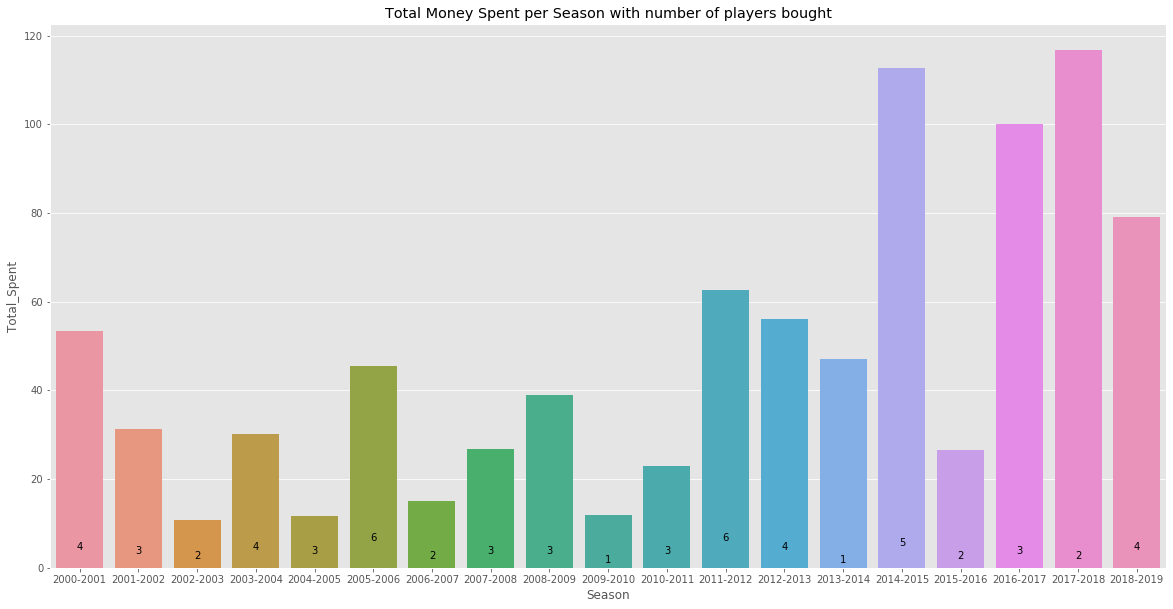

In [20]:
season_wise_buy = arsenal_buy.groupby('Season')['Name'].agg('count')
a = season_wise_buy.reset_index()

season_wise_transfer = arsenal_buy.groupby('Season')['Transfer_fee'].agg('sum')
b = season_wise_transfer.reset_index()

c = pd.merge(a,b,on='Season')
c = c.rename(columns = {'Name':'Players_bought','Transfer_fee':'Total_Spent'})

plt.figure(figsize=(20,10))
plt.title("Total Money Spent per Season with number of players bought")
g = sns.barplot("Season",(c.Total_Spent/1000000),data = c)
for index, row in c.iterrows():
    g.text(row.name,row.Players_bought, round(row.Players_bought,2), color='black', ha="center")
plt.show()

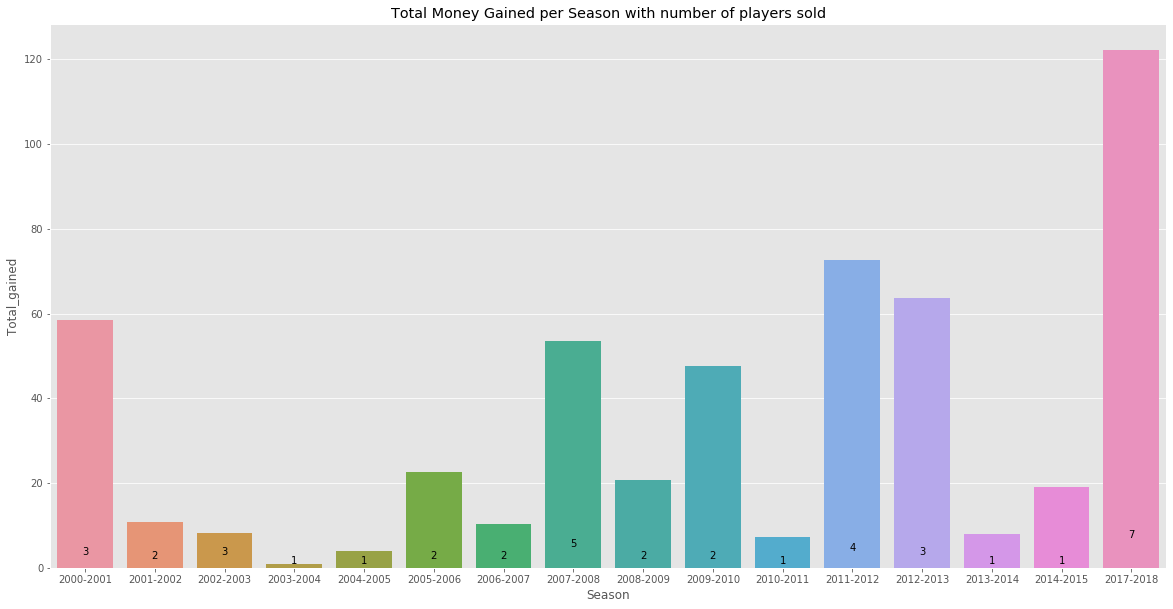

In [22]:
season_wise_sell = arsenal_sell.groupby('Season')['Name'].agg('count')
x = season_wise_sell.reset_index()

season_wise_transfer_sell = arsenal_sell.groupby('Season')['Transfer_fee'].agg('sum')
y = season_wise_transfer_sell.reset_index()

z = pd.merge(x,y,on='Season')
z = z.rename(columns = {'Name':'Players_sold','Transfer_fee':'Total_gained'})

plt.figure(figsize=(20,10))
plt.title("Total Money Gained per Season with number of players sold")
h = sns.barplot("Season",(z.Total_gained/1000000),data = z)
for index, row in z.iterrows():
    h.text(row.name,row.Players_sold, round(row.Players_sold,2), color='black', ha="center")
plt.show()

In [23]:
final_merge = pd.merge(c,z,on="Season")
final_merge['Profit/Loss'] = final_merge['Total_gained'] - final_merge['Total_Spent']
final_merge

,Season,Players_bought,Total_Spent,Players_sold,Total_gained,Profit/Loss
0,2000-2001,4,53300000,3,58500000,5200000
1,2001-2002,3,31250000,2,10800000,-20450000
2,2002-2003,2,10730000,3,8220000,-2510000
3,2003-2004,4,30250000,1,1000000,-29250000
4,2004-2005,3,11700000,1,3900000,-7800000
5,2005-2006,6,45500000,2,22500000,-23000000
6,2006-2007,2,15000000,2,10400000,-4600000
7,2007-2008,3,26850000,5,53500000,26650000
8,2008-2009,3,38900000,2,20800000,-18100000
9,2009-2010,1,12000000,2,47700000,35700000


## Any Team Analysis

Will Show:
1. Top Players Bought & Top Players Sold
2. Top Position Bought & Top Position Sold
3. Teams/Leagues to which players are sold & from which players are bought
4. Season wise buys and sell

                 Name          Position  Transfer_fee    Team_from
3961       Paul Pogba  Central Midfield     105000000     Juventus
4214    Romelu Lukaku    Centre-Forward      84700000      Everton
3469   Ángel Di María      Right Winger      75000000  Real Madrid
3716  Anthony Martial       Left Winger      60000000       Monaco
4461             Fred  Central Midfield      59000000  Shakhtar D.
                     Name            Position  Transfer_fee      Team_to
2226    Cristiano Ronaldo      Centre-Forward      94000000  Real Madrid
3715       Ángel Di María        Right Winger      63000000     Paris SG
742         David Beckham      Right Midfield      37500000  Real Madrid
261             Jaap Stam         Centre-Back      25750000        Lazio
4006  Morgan Schneiderlin  Defensive Midfield      22900000      Everton


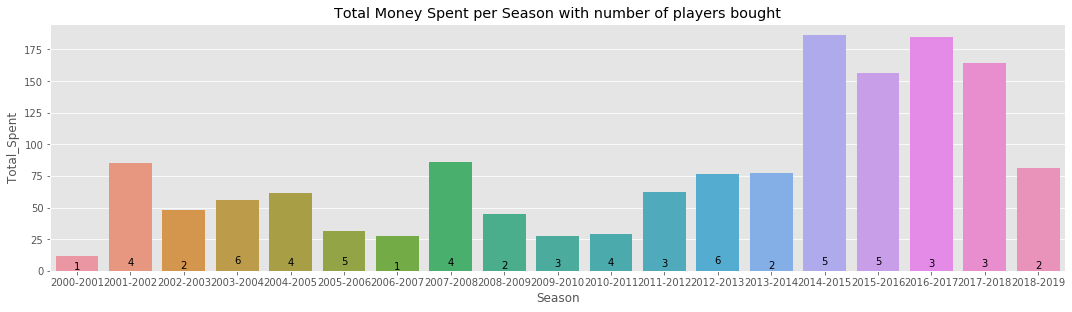

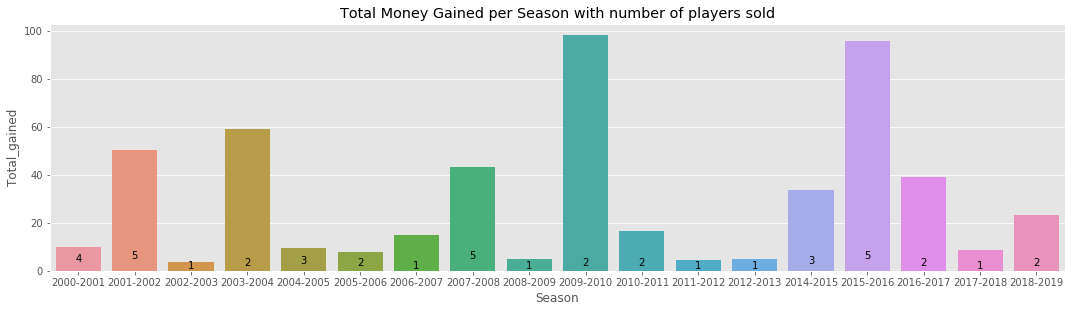


      Season  Players_bought  Total_Spent  Players_sold  Total_gained  \
0  2000-2001               1     11700000             4       9880000   
1  2001-2002               4     85100000             5      50250000   
2  2002-2003               2     48230000             1       3500000   
3  2003-2004               6     55800000             2      59000000   
4  2004-2005               4     61250000             3       9490000   

   Profit/Loss  
0     -1820000  
1    -34850000  
2    -44730000  
3      3200000  
4    -51760000  


In [55]:
def dataframe(df):
    df.style.set_table_styles([{'selector':'','props':[('border','4px solid #7a7')]}])
    print(df)

def Team_analyze(your_team):
    team = df.loc[(df['Team_to'] == your_team) | (df['Team_from'] == your_team) ]
    
    team_buy = team.loc[team['Team_to']== your_team]
    team_sell = team.loc[team['Team_from']==your_team]
      

    top5buy_a = team_buy[['Name','Position','Transfer_fee','Team_from']]
    top5buy_a = top5buy_a.sort_values(by='Transfer_fee',ascending = False).head()
    top5sell_a = team_sell[['Name','Position','Transfer_fee','Team_to']]
    top5sell_a =top5sell_a.sort_values(by='Transfer_fee',ascending = False).head()
    dataframe(top5buy_a)
    dataframe(top5sell_a)
    
    
    leaguebought_a = team_buy.groupby('League_from')['Position'].agg('count')
    leaguebought_a.sort_values(ascending = False).head()
    teambought_a = team_buy.groupby('Team_from')['Position'].agg('count')
    teambought_a.sort_values(ascending = False).head()
    
    leaguesold_a = team_sell.groupby('League_from')['Position'].agg('count')
    leaguesold_a.sort_values(ascending = False).head()
    teamsold_a = team_sell.groupby('Team_from')['Position'].agg('count')
    teamsold_a.sort_values(ascending = False).head()
    
    
    
    season_wise_buy = team_buy.groupby('Season')['Name'].agg('count')
    a = season_wise_buy.reset_index()
    season_wise_transfer = team_buy.groupby('Season')['Transfer_fee'].agg('sum')
    b = season_wise_transfer.reset_index()
    c = pd.merge(a,b,on='Season')
    c = c.rename(columns = {'Name':'Players_bought','Transfer_fee':'Total_Spent'})

    plt.figure(figsize=(40,10))
    plt.subplot(2,2,1)
    plt.title("Total Money Spent per Season with number of players bought")
    g = sns.barplot("Season",(c.Total_Spent/1000000),data = c)
    for index, row in c.iterrows():
        g.text(row.name,row.Players_bought, round(row.Players_bought,2), color='black', ha="center")
    plt.show()
    
    
    
    season_wise_sell = team_sell.groupby('Season')['Name'].agg('count')
    x = season_wise_sell.reset_index()
    season_wise_transfer_sell = team_sell.groupby('Season')['Transfer_fee'].agg('sum')
    y = season_wise_transfer_sell.reset_index()

    z = pd.merge(x,y,on='Season')
    z = z.rename(columns = {'Name':'Players_sold','Transfer_fee':'Total_gained'})
    print()
    plt.figure(figsize=(40,10))
    plt.subplot(2,2,3)
    plt.title("Total Money Gained per Season with number of players sold")
    h = sns.barplot("Season",(z.Total_gained/1000000),data = z)
    for index, row in z.iterrows():
        h.text(row.name,row.Players_sold, round(row.Players_sold,2), color='black', ha="center")
    plt.show()
    
    
    
    final_merge = pd.merge(c,z,on="Season")
    final_merge['Profit/Loss'] = final_merge['Total_gained'] - final_merge['Total_Spent']
    print()
    dataframe(final_merge.head())
    
    
    
Team_analyze("Man Utd")